In [1]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from copy import copy
import analysis.retroBO_analysis_functions as fns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# mpl.style.use('mystyle.mplstyle')

inch_conversion = 1/25.4
page_width = 142.4 *inch_conversion
column_width = 67.2* inch_conversion

# Notebook for Plotting Retrospective Bayesian Optimisation Results for Penalized Case

This notebook is for plotting the results of the retrospective Bayesian optimisation on the PCR data.

First specify the results to be plotted.

In [2]:
param_name = 'both' # which parameters
save=False
params = ['r', 'm']

# random_if_none=False
starting_points = ['centre', '0_point_start'] #, '0_point_start', 'centre',
learning_types = ['learning_many', 'learning_1'] #'learning many',

Load the results

In [4]:
res_dfs = {}
results_path = pl.Path(os.getcwd()) / 'results' / 'penalized_bayes_opt_diff_inits'
for key in ['centre_learning_many', '0_point_start_learning_many']:
    res_dfs[key] = pd.read_csv(results_path /f'penalized_bayes_opt_diff_init_{key}.csv', index_col=0)


Check what data is missing

In [5]:
new_res_dfs = {}
for key, df in res_dfs.items():
    initial_surfaces = df['init_surfaces'].unique()
    print(initial_surfaces)
    for surface in initial_surfaces:
        new_res_dfs[f'{key}_{surface}'] = df[df['init_surfaces'] == surface]

['many_FP004-RP004x-Probe_FP002-RP002x-Probe'
 'many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']
['many_FP004-RP004x-Probe_FP002-RP002x-Probe'
 'many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']


In [7]:
res_dfs = {}
surface = 'FP004-RP004-EvaGreen_FP002-RP002x-Probe'
results_path = pl.Path(os.getcwd()) / 'results' / 'penalized_bayes_opt'
for key in ['centre_learning_many', '0_point_start_learning_many']:
    new_res_dfs[f'{key}_many_{surface}'] = pd.read_csv(results_path / f'bayes_opt_{key}.csv', index_col=0)

In [24]:
new_res_dfs.keys()

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])

In [27]:
res_dfs = new_res_dfs

In [28]:
for key, df in res_dfs.items():
    res_dfs[key] = df[(df['seed'] < 21) & (df['seed'] > 0)]


In [29]:
seeds_df = pd.DataFrame(columns=list(res_dfs.keys()),
                        index=res_dfs[f'centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']['PrimerPairReporter'].unique())

for key, df in res_dfs.items():

    for ppr in df['PrimerPairReporter'].unique():
        df_ = df[df['PrimerPairReporter'] == ppr]
        # counts = df_.value_counts('seed').to_frame()
        seeds_df[key][ppr] = len(df_['seed'].unique())

print(seeds_df)

                      centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe  \
FP001-RP001x-EvaGreen                                                 20                
FP002-RP002x-EvaGreen                                                 20                
FP005-FP001-Probe                                                     20                
RP001x-FP002-Probe                                                    20                
RP002x-FP005-Probe                                                    20                
FP005-FP004-EvaGreen                                                  20                
FP004-RP004-Probe                                                     20                
RP002x-FP002-EvaGreen                                                 20                
FP001-RP004-EvaGreen                                                  20                
FP002-RP004-EvaGreen                                                  20                
FP004-FP005-Probe    

If necessary, see which seeds are missing data:

In [30]:
for key, df in res_dfs.items():
    print(key)
    counts_df = pd.DataFrame(columns=res_dfs[f'centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']['PrimerPairReporter'].unique())
    for ppr in df['PrimerPairReporter'].unique():
        df_ = df[(df['PrimerPairReporter'] == ppr)  & (df['model'] == 'mo_indi')][['BP', 'GC', 'seed']].drop_duplicates()
        counts = df_.value_counts('seed').to_frame().sort_values(by='seed')
        counts_df[ppr] = df_.value_counts('seed').to_frame().sort_values(by='seed')
        # seeds_df[key][ppr] = len(df_['seed'].unique())
    print(counts_df.T.to_string())

centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe
seed                   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20
FP001-RP001x-EvaGreen  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24
FP002-RP002x-EvaGreen  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
FP005-FP001-Probe       8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
RP001x-FP002-Probe     19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19
RP002x-FP005-Probe      8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
FP005-FP004-EvaGreen    8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
FP004-RP004-Probe      31  31  31  31  30  31  31  31  31  31  30  29  31  31  31  31  30  30  31  31
RP002x-FP002-EvaGreen   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
FP001-RP004-EvaGre

In [31]:

for name, df in res_dfs.items():
    if 'init_surfaces' not in df.columns:
        df['init_surfaces'] = 'FP004-RP004-EvaGreen_FP002-RP002x-Probe'
    # print(df.head().to_string())
    res_dfs[name] = df  

Calculate the regret

In [32]:
print(params)

['r', 'm']


In [33]:
df.columns

Index(['BP', 'GC', 'PrimerPairReporter', 'r', 'stzd r', 'r_mu', 'r_sig2',
       'r_mu_z', 'r_sig2_z', 'm', 'stzd m', 'm_mu', 'm_sig2', 'm_mu_z',
       'm_sig2_z', 'EI_z', 'Sequence Name', 'target r', 'target r z',
       'target m', 'target m z', 'model', 'iteration', 'error r',
       'error from target r z', 'error from target r', 'error r z', 'error m',
       'error from target m z', 'error from target m', 'error m z',
       'initial_surface', 'seed', 'init_surfaces'],
      dtype='object')

In [34]:
stzd = True
max_iter = 20

if len(params) > 1:
    regret_metric = 'combined regret'
else:
    regret_metric = 'regret r'
# starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
# learning_type_names = {'learning_many':'Learning Many', 'learning_1':'Learning One\nat a Time'}
plot_minmax = True
regrets_all = {}
regret_names = []
for name, df in res_dfs.items():
    best_points = fns.get_best_points_penalized(params, df, stzd=stzd, log_t=False)
    df = df.drop(columns=['Sequence Name', 'init_surfaces'])
    regret_df_all = fns.calculate_regret(df, params, best_points, stzd=stzd, penalized=True,
                                         diff_from_target_only=False)
    regret_df_all = regret_df_all[regret_df_all['iteration'] <=max_iter]
    regret_df_all.loc[regret_df_all['combined regret'] <1e-2,  'combined regret'] = 1e-2
    regrets_all[name] = regret_df_all

In [35]:

cumulative_regrets = {}
for name, regret_df in regrets_all.items():

    if 'r' in params and 'm' in params:
        regret_names = ['combined regret']
    else:
        regret_names = [f'regret {param}' for param in params]

    # if learning_type == 'learning many':
    #     for seed in regret_df['seed'].unique():
    #         temp_df = regret_df[regret_df['seed'] == seed]
    #         if temp_df['iteration'].max() != max_iter:
    #             regret_df= regret_df[regret_df['seed'] != seed]

    regret_df = regret_df.sort_values('iteration')

    # calculate the cumulative minimum regret and cumulative sum of regret

    for model in regret_df['model'].unique():
        for seed in regret_df['seed'].unique():
            for ppr in regret_df['PrimerPairReporter'].unique():
                for regret_name in regret_names:
                    regret_df.loc[
                        (regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                    regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cummin'] = \
                        regret_df.loc[(regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                regret_df['PrimerPairReporter'] == ppr), regret_name].cummin()
                    regret_df.loc[
                        (regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                    regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cumsum'] = \
                        regret_df.loc[(regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cummin'].cumsum()
    cumulative_regrets[name] = regret_df


In [36]:
regret_metrics = {}
for name, regret_df in cumulative_regrets.items():
    # regret_df = regret_df[regret_df['PrimerPairReporter'].str.contains('EvaGreen')]

    i_max = regret_df['iteration'].max() #.loc[regret_df['model'] =='avg',

    for ppr in regret_df['PrimerPairReporter'].unique():

        ppr_imax = regret_df.loc[regret_df['PrimerPairReporter'] == ppr, 'iteration'].to_numpy().max()
        if ppr_imax == i_max:
            pass
        else:
            extra_rows = pd.concat([regret_df.loc[(regret_df['PrimerPairReporter'] == ppr)
                                            & (regret_df['iteration'] == ppr_imax)]] * int((i_max - ppr_imax)))
            extra_rows = extra_rows.sort_values(['model', 'seed'])
            if ppr_imax < (i_max - 1):
                test = np.arange(ppr_imax + 1, i_max + 1).tolist() * int(len(extra_rows)/(i_max-ppr_imax))
                extra_rows['iteration'] = np.arange(ppr_imax + 1, i_max + 1).tolist() \
                                          * int(len(extra_rows)/(i_max-ppr_imax))
                regret_df = regret_df.append(extra_rows)
            elif ppr_imax == (i_max - 1):
                extra_rows['iteration'] = i_max
                regret_df = regret_df.append(extra_rows)
            else:
                pass
    # if 'learning many' in name:
    df = regret_df.groupby(['model', 'iteration', 'seed']).mean().reset_index()

    df2 = df.groupby(['model', 'iteration']).mean().reset_index()
    df3 = df.groupby(['model', 'iteration']).median().reset_index()
    df4 = df.groupby(['model', 'iteration']).quantile(0.05).reset_index()
    df5 = df.groupby(['model', 'iteration']).quantile(0.95).reset_index()
    metrics = ['mean', 'median', 'min', 'max']

    dfs = [df2, df3, df4, df5]
    for i in range(len(dfs)):
        for col in [f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]:
            dfs[i][f'{metrics[i]} {col}'] = dfs[i][col]
        dfs[i] = dfs[i].drop(
            columns=[f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]
                    + ['seed', 'index'] + regret_names)
    regret_df = dfs[0].merge(dfs[1], on=['model', 'iteration'])
    regret_df = regret_df.merge(dfs[2], on=['model', 'iteration'])
    regret_df = regret_df.merge(dfs[3], on=['model', 'iteration'])

    # else:
    #
    #     # calculate the mean, min, and max of the cumulative minimum regret and cumulative sum of
    #     # regret across all seeds for each primer pair reporter
    #
    #     df4 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).mean().reset_index()
    #     df7 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).median().reset_index()
    #     df5 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).quantile(0.05).reset_index()
    #     df6 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).quantile(0.95).reset_index()
    #
    #     # create new dataframe which combines these metrics
    #
    #     metrics = ['mean', 'min', 'max', 'median']
    #     dfs = [df4, df5, df6, df7]
    #     for i in range(len(dfs)):
    #         for col in [f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]:
    #             dfs[i][f'{metrics[i]} {col}'] = dfs[i][col]
    #         dfs[i] = dfs[i].drop(
    #             columns=[f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]
    #                     + ['seed', 'index'] + regret_names)
    #
    #     regret_df = dfs[0].merge(dfs[1], on=['model', 'iteration', 'PrimerPairReporter'])
    #     regret_df = regret_df.merge(dfs[2], on=['model', 'iteration', 'PrimerPairReporter'])
    #     regret_df = regret_df.merge(dfs[3], on=['model', 'iteration', 'PrimerPairReporter'])


    regret_df = regret_df.groupby(['model', 'iteration']).mean().reset_index()
    regret_metrics[name] = regret_df

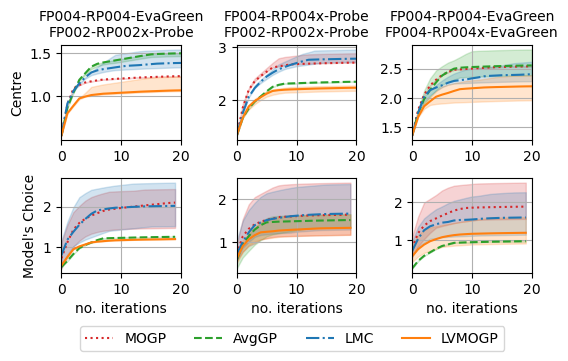

In [41]:
linestyles = {'lmc':'dashdot', 'mo_indi': 'dotted', 'lvm':  'solid' , 'avg': 'dashed' }
def get_colors():
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    cols = ['#253494', '#2c7fb8','#41b6c4',  '#a1dab4']
    colors = {'lmc': cols[0], 'mo_indi': cols[3], 'lvm': cols[1], 'avg': cols[2]}
    return colors

starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
learning_type_names = {'learning many':'Many Surfaces', 'learning 1':'One at a Time'}
labels = {'mo_indi':'MOGP', 'avg':'AvgGP', 'lmc': 'LMC', 'lvm':'LVMOGP'}

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[page_width, page_width*0.6])
colors = fns.get_colors()
plot_minmax=True
starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
learning_type_names = {'learning_many':'Many Surfaces', 'learning_1':'One at a Time'}
initial_surfaces = ['FP004-RP004-EvaGreen_FP002-RP002x-Probe', 'FP004-RP004x-Probe_FP002-RP002x-Probe', 'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']
titles = {'FP004-RP004-EvaGreen_FP002-RP002x-Probe':'FP004-RP004-EvaGreen\nFP002-RP002x-Probe', 
          'FP004-RP004x-Probe_FP002-RP002x-Probe':'FP004-RP004x-Probe\nFP002-RP002x-Probe',
            'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen':'FP004-RP004-EvaGreen\nFP004-RP004x-EvaGreen'}
labels = {'mo_indi':'MOGP', 'avg':'AvgGP', 'lmc': 'LMC', 'lvm':'LVMOGP'}

for i, init_surface in enumerate(initial_surfaces): #, 'learning 1'
    for j, starting_point in enumerate(starting_points):
        name = f'{starting_point}_learning_many_many_{init_surface}'
        regret_df = regret_metrics[name]
        if (starting_point =='0_point_start') & (init_surface in ['FP004-RP004x-Probe_FP002-RP002x-Probe', 'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']):
            regret_df['iteration'] = regret_df['iteration'] - 1

        for model in ['mo_indi', 'avg', 'lmc', 'lvm']:
            df = regret_df[(regret_df['model'] == model) ].sort_values('iteration')
            if (i==0) & (j==0):
                label = labels[model]
            else:
                label = None
            axs[j, i].plot(df['iteration'], df[f'median {regret_metric} cumsum'], label=label,
                        color=colors[model], linestyle=linestyles[model])
            if plot_minmax:
                
                axs[j, i].fill_between(df['iteration'], df[f'min {regret_metric} cumsum'],
                                    df[f'max {regret_metric} cumsum'],
                                    alpha=0.2, color=colors[model])
        axs[0, i].set_title(f'{titles[init_surface]}', fontsize=10)
        axs[j,0].set_ylabel(starting_point_names[starting_point])
        axs[1,i].set_xlabel('no. iterations')


rows = [f'{row}' for row in starting_point_names.values()]
# for ax, row in zip(axs[:,0], rows):
#     ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 fontsize=10, ha='right', va='center', rotation=90)
for ax in axs.flatten():
    ax.set_xlim(0, 20)
    ax.grid()

        # plt.suptitle('Cumulative Regret')
        # axs[j, i].legend()

fig.legend(loc="lower center", ncols=4,
               bbox_to_anchor=(0.53, -0.08))

plt.tight_layout()
plt.savefig(pl.Path(os.getcwd()) / f'analysis/plots/retroBO_cumulative_regret_all_diff_inits_{param_name}.pdf', bbox_inches='tight')
# plt.savefig(f'plots/retroBO_cumulative_regret_all_{param_name}.pdf', bbox_inches='tight')
# plt.savefig(f'plots/retroBO_cumulative_regret_all_{param_name}.svg', bbox_inches='tight')
